In [ ]:
import numpy as np # linear algebra
import pandas as pd


In [ ]:
#load the libraries and data...
import matplotlib.pyplot as plt
import matplotlib.animation as animation

data=pd.read_csv('/content/Sales.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
x=data['GrLivArea']
y=data['SalePrice']

x=(x-x.mean()) / x.std()
x=np.c_[np.ones(x.shape[0]), x]

In [ ]:
#GRADIENT DESCENT

alpha=0.01 #stepsize
iterations=2000 #number of iterations
m=y.size
np.random.seed(123)
theta=np.random.rand(2)

#GRADIENT DESCENT
def gradient_descent(x,y,theta,iterations,alpha):
  past_costs=[]
  past_thetas=[theta]
  for i in range(iterations):
    prediction=np.dot(x,theta)
    error=prediction-y
    cost=(1/(2*m))*np.dot(error.T,error)
    past_costs.append(cost)
    theta=theta-(1/m)*alpha*(np.dot(x.T,error))
    past_thetas.append(theta)

  return past_thetas,past_costs

past_thetas,past_costs=gradient_descent(x,y,theta,iterations,alpha)
theta=past_thetas[-1]

print('Gradient Descent: {:.2f}, {:.2f}'.format(theta[0], theta[1]))

Gradient Descent: 180921.20, 56294.90


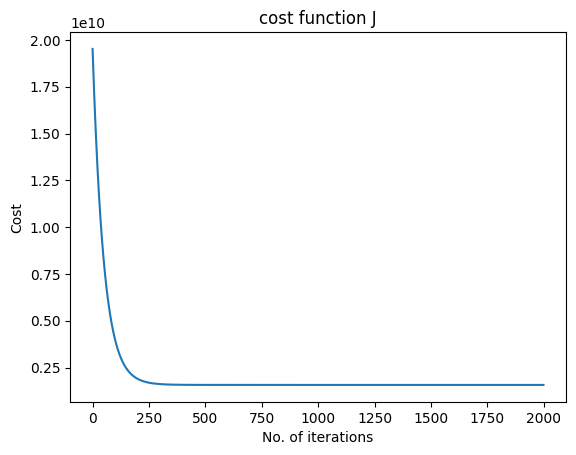

In [ ]:
#plot the cost function...
plt.title('cost function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [ ]:
#animation

#set the plot up,
fig=plt.figure()
ax=plt.axes()
plt.title('SalePrice vs LivingArea')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1],y,color='red')
line,=ax.plot([],[],lw=2)
annotation=ax.text(-1, 700000,'')
annotation.set_animated(True)
plt.close()

#generate the animation data,
def init():
  line.set_data([],[])
  annotation.set_position((-1, 700000))
  return line,annotation

#animation function. this is called sequentially
def animate(i):
  x=np.linspace(-5,20,1000)
  y=past_thetas[i][1]*x+past_thetas[i][0]
  line.set_data(x,y)
  annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
  return line,annotation

anim=animation.FuncAnimation(fig,animate,init_func=init,frames=300,interval=0,blit=True)

anim.save('animation.gif',writer='imagemagick',fps=30)


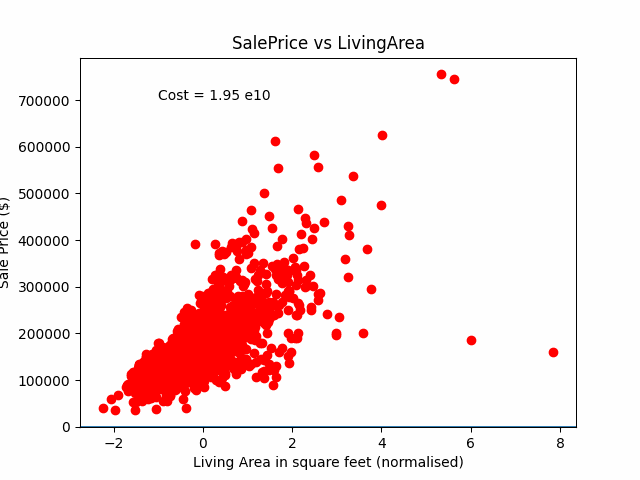

In [ ]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open('animation.gif', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))